In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

This tutorial walks you through how to use the `run_scan` class to constrain the parameters of the Bulge and disk luminosity functions and perform frequentist model comparison.  The class has the following arguments and is described below through examples.

```
            :param fixed_params: Array of parameters to be held fixed
            :param fixed_param_vals: Array of values for parameters to be held fixed
            :param floated_params: Array of parameters to be floated
            :param floated_param_priors: Priors array for parameters to be floated
            :param data_dir: Directory containing the required maps
            :param Lmin: Minimum luminosity (erg s$^{-1}$)
            :param Lmax_disk: Maximum luminosity for disk (erg s$^{-1}$)
            :param Lmax_bulge: Maximum luminosity for bulge (erg s$^{-1}$)
            :param Ns: Number of integration point in z (kpc)
            :param Nang: Number of angular integration points
            :param smax_disk: How far to integrate out to for disk  (kpc)
            :param theta_mask: How many inner degrees to mask
            :param share_betas: Whether to float a single beta for disk and bulge
            :param use_prior: Whether to use prior on total number of sources
            :param Nang_prior: How many angular bins to use over full sky when using prior
            :param efficiency_long: Whether to use longitude-dependent efficiency
            :param efficiency_custom: Option to provide a custom efficiency function
```

# Excercise 1: Compare the disk + bulge to the disk only, with most parameters fixed

As the first exercise, we will fix all of the parameters except for $N_B$ and $N_D$, the number of Bulge and disk sources, respectively, and we will compute the TS in favor of the model with the Bulge population.  We will show how to use both `multinest` and `minuit` to scan over the likelihood profile.  `minuit` is faster, but `multinest` can be more reliable, especially for parameter estimation.

_*Caution*_: there are more keywords than those desribed below available in the `run_scan` class.  See the code for details.

## Float $N_D$ and $N_B$

We initially start by floating the number of bulge and disk sources.  All other parameters are fixed below.  Note that we need to specify the prior ranges for the floated parameters.

In [2]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

Now, we initialize the main class

In [3]:
rs = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

### Using Minuit

First, we run using `minuit`

In [4]:
rs.perform_scan_minuit()

FCN = 324.591049484 
 TOTAL NCALL = 84 
 NCALLS = 84 
 
 
 EDM = 5.28364678927e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,536.533,310.347,0,0,0.0,8000.0,
2,N_disk,3290.3,816.918,0,0,0.0,10000.0,


### Using MultiNest

Next, with `multinest`

In [5]:
rs.perform_scan_multinest(chains_dir='../run/chains/DiskAndBulge/')

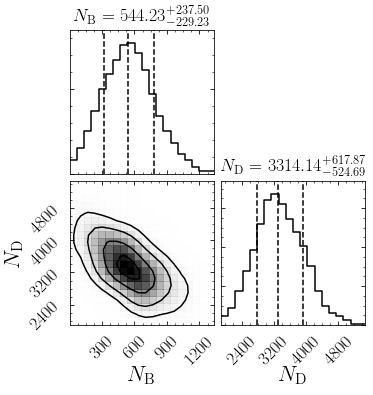

In [6]:
rs.plot_corner(labels = ['$N_\mathrm{B}$','$N_\mathrm{D}$'], chains_dir='../run/chains/DiskAndBulge/')

## Float only $N_D$

Now, we will fix the same parameters but only include a disk population.  We do this by fixing the number of Bulge sources to zero.

In [40]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','N_bulge','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,0,1.0e36,1.0e36]

floated_params = ['N_disk']
floated_param_priors = [[0,10000]]

### Using Minuit

In [41]:
rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

In [42]:
rs_nd.perform_scan_minuit()

FCN = 328.246720586 
 TOTAL NCALL = 22 
 NCALLS = 22 
 
 
 EDM = 3.53491308773e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_disk,4472.75,657.539,0,0,0.0,10000.0,


### Using MultiNest

In [10]:
rs_nd.perform_scan_multinest(chains_dir='../run/chains/DiskOnly/')

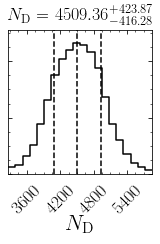

In [11]:
rs_nd.plot_corner(labels = ['$N_\mathrm{D}$'], chains_dir='../run/chains/DiskOnly/')

## Compute the test statistic for $N_D$ vs. $N_D$ and $N_B$

The max likelihood is computed in the `minuit` stage (though it may also be extracted from the `samples` generated during the `multinest` stage, if that is also run).  Here, we use the `max_LL` to compute the TS, which is the final result of the calculation.

In [12]:
TS = 2* (rs.max_LL - rs_nd.max_LL)
print "The TS = ", TS, ", which means the evidence for the Bulge PS population is ", np.sqrt(TS), " sigma"

The TS =  7.31134224112 , which means the evidence for the Bulge PS population is  2.70394937843  sigma


# Exercise 2: floating more parameters

It is easy to float more parameters.  Below, we give a few examples for this.  We will only use `minuit` here, since it is faster.

## Float $N_D$, $N_B$ and $z_0$

First, let's float $z_0$

In [13]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','beta_bulge','beta_disk']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,1.2,1.2]

floated_params = ['N_bulge','N_disk','z0']
floated_param_priors = [[0,8000],[0,10000],[0.2,1.5]]

In [14]:
rs_z0 = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

In [15]:
rs_z0.perform_scan_minuit()

FCN = 324.567148064 
 TOTAL NCALL = 226 
 NCALLS = 226 
 
 
 EDM = 1.02686028902e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,528.698,311.616,0,0,0.0,8000.0,
2,N_disk,3268.5,829.2,0,0,0.0,10000.0,
3,z0,0.737912,0.24487,0,0,0.2,1.5,


We can compute how much floating $z_0$ improved the fit, versus the previous calculation where we fixed $z_0$

In [16]:
TS = 2*(rs_z0.max_LL - rs.max_LL)
print "TS = ", TS

TS =  0.0478028395931


So, floating $z_0$ doesn't appear to give us much improvement here

## Float $\beta$s together

We can float the $\beta$ parameters together or separately.  Here, we give an example where they are floated together.  That is, both $\beta_{bulge}$ and $\beta_{disk}$ are both equal to $\beta$, which is floated in the scan.

In [17]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk','z0','beta']
floated_param_priors = [[0,1000000],[0,1000000],[0.2,1.5],[1.1,2.0]]

In [18]:
rs_betas = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, share_betas=True)

In [19]:
rs_betas.perform_scan_minuit()

FCN = 291.567944556 
 TOTAL NCALL = 450 
 NCALLS = 450 
 
 
 EDM = 7.05967393721e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,126272,113735,0,0,0.0,1000000.0,
2,N_disk,492979,266421,0,0,0.0,1000000.0,
3,z0,0.2,0.0460241,0,0,0.2,1.5,
4,beta,1.94293,0.0945327,0,0,1.1,2.0,


In [20]:
TS = 2*(rs_betas.max_LL - rs.max_LL)
print "TS = ", TS

TS =  66.0462098547


Here, we see a significant change in the TS letting the $\beta$ float versus not letting it float.

## Floating $\beta_{disk}$, $\beta_{bulge}$, $L_{max}^{disk}$, and $L_{max}^{bulge}$

Now, we will float $\beta_{disk}$, $\beta_{bulge}$, $z_0$, $L_{max}^{disk}$, and $L_{max}^{bulge}$.  First we will do the model with the disk and bulge and then we will do the disk only.  At the end, we will compute the TS.

In [21]:
fixed_params = ['n','sigma','alpha','z0']
fixed_param_vals = [2.35,1.528,2.6,0.5]

floated_params = ['N_bulge','N_disk','Lmax_disk','Lmax_bulge','beta_disk','beta_bulge']
floated_param_priors = [[0,10000000],[0,100000000],[1e35,5.0e37],[1e35,5.0e37],[1.1,2.0],[1.1,2.0]]

In [22]:
rs_betas_Ls = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 2)

In [23]:
rs_betas_Ls.perform_scan_minuit()

FCN = 309.104879771 
 TOTAL NCALL = 291 
 NCALLS = 291 
 
 
 EDM = 9.6482476448e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,1382.74,441.31,0,0,0.0,10000000.0,
2,N_disk,1989.56,512.446,0,0,0.0,100000000.0,
3,Lmax_disk,4.4277e+35,9.25373e+34,0,0,1e+35,5e+37,
4,Lmax_bulge,1.11047e+35,2.21633e+34,0,0,1e+35,5e+37,
5,beta_disk,1.1,0.00988816,0,0,1.1,2.0,
6,beta_bulge,1.1,0.00488927,0,0,1.1,2.0,


Now without the bulge

In [24]:
fixed_params = ['n','sigma','alpha','z0','Lmax_bulge','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,0.5,1.0e36,0.0]

floated_params = ['N_disk','Lmax_disk','beta_disk']
floated_param_priors = [[0,100000000],[1e35,5.0e37],[1.1,2.0]]

In [25]:
rs_betas_Ls_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 2)

In [26]:
rs_betas_Ls_nd.perform_scan_minuit()

FCN = 305.085383432 
 TOTAL NCALL = 429 
 NCALLS = 429 
 
 
 EDM = 0.000196102620075 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_disk,332389,228556,0,0,0.0,100000000.0,
2,Lmax_disk,1.02855e+37,2.95056e+37,0,0,1e+35,5e+37,
3,beta_disk,1.8537,0.10311,0,0,1.1,2.0,


In [27]:
TS = 2*(rs_betas_Ls.max_LL - rs_betas_Ls_nd.max_LL )
print "TS = ", TS

TS =  -8.03899267856


The above examples aren't very well conveged.  Maybe there are too many parameters for such a small scan, or maybe bigger issues.

# Exercise 3: increasing the accuracy

There are a few ways that the accuracy may be improved.
    1.  Integrate over more angular bins in each pixel, when computing the expected number of counts
    2.  Integrate over more `s` bins (i.e., over more bins in distance from the Earth), when computing the expected number of counts.
    3.  Using a prior on the number of sources.
Below, we will illustrate 2. and 3., since 1. is straightforward given 2.

## Integrate over angular bins

The `Nang` keyword gives the number of angular bins in the integrals, while `Ns` gives the number of `s` bins.  The larger these numbers, the more accurate.

In [28]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_bulge','Lmax_disk']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

In [29]:
rs_angint = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 5)

In [30]:
rs_angint.perform_scan_minuit()

FCN = 326.311961596 
 TOTAL NCALL = 83 
 NCALLS = 83 
 
 
 EDM = 1.05131626879e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,718.185,358.653,0,0,0.0,8000.0,
2,N_disk,3022.96,802.102,0,0,0.0,10000.0,


In [31]:
TS = 2* (rs_angint.max_LL -  rs.max_LL)
print "TS = ", TS

TS =  -3.44182422455


The above gives a sense for the error induced on the TS by only including 1 angular bins, versus including 5

## Use a prior on the total number of sources

Examples 1. and 2. did not include a prior on the observed number of sources.  It is easy to do this, as shown below.  Simply set `use_prior=True`.

In [32]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_bulge','Lmax_disk']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

In [33]:
rs_prior = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, use_prior=True)

In [34]:
rs_prior.perform_scan_minuit()

FCN = 324.889957017 
 TOTAL NCALL = 84 
 NCALLS = 84 
 
 
 EDM = 0.000117954439592 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,514.164,308.556,0,0,0.0,8000.0,
2,N_disk,3411.85,807.026,0,0,0.0,10000.0,


In [35]:
TS = 2* (rs_prior.max_LL -  rs.max_LL)
print "TS = ", TS

TS =  -0.597815066101


Again, the above gives a sense for the error induced on the TS by not including a prior.  In this example, it is pretty minimal.  Still, we can compute the TS in favor of the model with the bulge population, including the prior, but first we need to do the disk only:

In [36]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_bulge','Lmax_disk','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36,0.0]

floated_params = ['N_disk']
floated_param_priors = [[0,10000]]

In [37]:
rs_prior_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, use_prior=True)

In [38]:
rs_prior_nd.perform_scan_minuit()

FCN = 328.292082584 
 TOTAL NCALL = 49 
 NCALLS = 49 
 
 
 EDM = 6.577002003e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_disk,4507.75,641.837,0,0,0.0,10000.0,


In [39]:
TS = 2* (rs_prior.max_LL -  rs_prior_nd.max_LL)
print "TS = ", TS
print "Sqrt(TS) = ", np.sqrt(TS)

TS =  6.80425113431
Sqrt(TS) =  2.60849595252
